In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider, HBox, VBox, Layout, Dropdown
from IPython.display import display
import ipywidgets as widgets
import sympy as sy
from sympy import *


In [2]:
x = Symbol('x')
s = Symbol('s')

In [3]:
def components(f, t, xValues):
    """Returns components of normalized tangential vector of evolved surface"""
    # calculate derivatives of f
    funcPrime = f.diff(x)
    func2Prime = funcPrime.diff(x)
    # turn derivatives into numpy expressions
    npFunc = lambdify(x, f, 'numpy')
    npFuncPrime = lambdify(x, funcPrime, 'numpy')
    npFunc2Prime = lambdify(x, func2Prime, 'numpy')
    # define often used qunatities
    denom = (1 + npFuncPrime(xValues)**2)**(3 / 2)
    # signed curvature
    k = npFunc2Prime(xValues) / denom
    # critical coefficient
    A = 1 -  k * t
    # define components
    c1 = A
    c2 = A * npFuncPrime(xValues)
    # define norm
    norm = np.sqrt(c1**2 + c2**2)
    #return normalized components
    return c1 / norm, c2 / norm

def kink_coeff(f, t, xValues):
    """Returns kink coefficient """
    # calculate derivatives of f
    funcPrime = f.diff(x)
    func2Prime = funcPrime.diff(x)
    # turn derivatives into numpy expressions
    npFuncPrime = lambdify(x, funcPrime, 'numpy')
    npFunc2Prime = lambdify(x, func2Prime, 'numpy')
    denom = (1 + npFuncPrime(xValues)**2)**(3 / 2)
    k = npFunc2Prime(xValues) / denom
    # calculate kink coefficient
    A = 1 - k * t
    chi = A / np.abs(A)
    return A, chi, k




In [4]:
f = x**2
fP = f.diff()
f2P = fP.diff()
print('Function f')
display(f)
print('First derivative of f')
display(fP)
print('Second derivative of f')
display(f2P)
denom = (1 + fP **2)**(3/2)
prefactor = 1 - f2P * s / denom
c1 = prefactor 
c2 = prefactor * fP
norm = sqrt(c1**2 + c2**2)
print('First component normalized')
display(c1 / norm)
print('Second component normalized')
display(c2 / norm)
print('Both expressions simplified')
display(simplify(factor(c1 / norm)))
display(simplify(factor(c2 / norm)))



Function f


x**2

First derivative of f


2*x

Second derivative of f


2

First component normalized


(-2*s/(4*x**2 + 1)**1.5 + 1)/sqrt(4*x**2*(-2*s/(4*x**2 + 1)**1.5 + 1)**2 + (-2*s/(4*x**2 + 1)**1.5 + 1)**2)

Second component normalized


2*x*(-2*s/(4*x**2 + 1)**1.5 + 1)/sqrt(4*x**2*(-2*s/(4*x**2 + 1)**1.5 + 1)**2 + (-2*s/(4*x**2 + 1)**1.5 + 1)**2)

Both expressions simplified


(-2*s + (4*x**2 + 1)**1.5)/((4*x**2 + 1)**1.5*sqrt(4*s**2/(4*x**2 + 1)**2.0 - 4*s/(4*x**2 + 1)**0.5 + (4*x**2 + 1)**1.0))

2*x*(-2*s + (4*x**2 + 1)**1.5)/((4*x**2 + 1)**1.5*sqrt(4*s**2/(4*x**2 + 1)**2.0 - 4*s/(4*x**2 + 1)**0.5 + (4*x**2 + 1)**1.0))

In [5]:
def plotting(
    input,
    t=0,
    posValueLimit=5,
    negValueLimit=5
    ):
    values = np.arange(-negValueLimit, posValueLimit, 0.01)
    fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
    fig.set_figheight(10)
    fig.set_figwidth(10)
    ax2.set_xlabel(r'$x$')
    ax1.set_ylabel(r'$\hat{T}_0(t,x)$')
    ax2.set_ylabel(r'$\hat{T}_1(t,x)$')
    ax2.set_xticks(np.arange(-negValueLimit, posValueLimit+1, .5))
    #plt.subplots_adjust(top=0.8)
    function = x**2
    try:
        function = eval(input)
    except Exception:
        # ignore error that appears when not done writing
        pass
    comp = components(function, t, values)
    kinkCoeff = kink_coeff(function, t, values)
    ax1.plot(values, comp[0])
    ax2.plot(values, comp[1])
    ax3.plot(values, kinkCoeff[0], label=r'$\mathcal{A}$')
    ax3.plot(values, kinkCoeff[1], label=r'$\chi$')
    ax3.plot(values, kinkCoeff[2], label=r'$k$')
    ax3.plot(values, np.zeros(len(values)), color='black')
    ax3.legend()
    return fig

In [6]:
def main():
    style = {'description_width': 'initial'}
    interact(plotting,
        input = widgets.Text(
            value='x**2',
            placeholder='Initial function e.g. x**2',
            description='Initial function:',
            disabled=False,
            style=style
        ),
        posValueLimit = widgets.IntSlider(min=1, max=20, step=1, description='Max. x-Value:', style=style), 
        negValueLimit = widgets.IntSlider(min=1, max=20, step=1, description='Min. x-Value:', style=style),
        t = widgets.FloatSlider(min=-20, max = 20, step = 0.1, description='Time', style=style),
    )

interactive(children=(Text(value='x**2', description='Initial function:', placeholder='Initial function e.g. x…

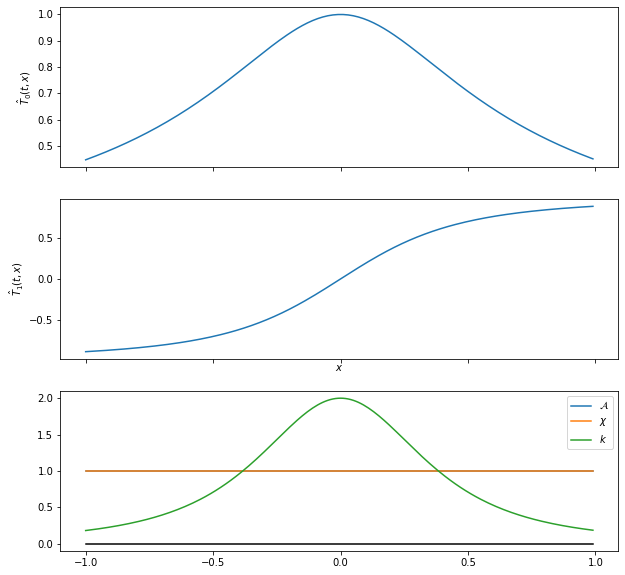

In [7]:
main()